Bibliotecas 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from matplotlib import style
import matplotlib.dates as mdates

In [2]:
style.use('ggplot')

Buscando dados 

In [24]:
tickers = ['TAEE11.SA', '^BVSP']
dados = pd.DataFrame()

for ticker in tickers:
    dados[ticker] = yf.download(ticker, start='2021-10-25')['Adj Close']

dados.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,TAEE11.SA,^BVSP
Date,,
2021-10-25,37.200001,108715.0
2021-10-26,36.720001,106420.0
2021-10-27,37.029999,106363.0
2021-10-28,36.730000,105705.0
2021-10-29,36.660000,103501.0


Gráfico: Cotação da TOTVS versus Pontos do IBOVESPA de outra forma

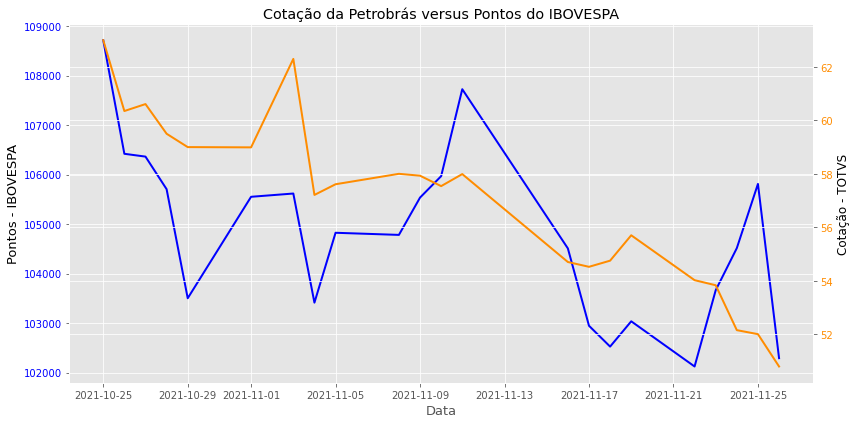

In [4]:
fig, ax1 = plt.subplots(figsize=(12, 6));

color = 'blue';
ax1.set_title('Cotação da Petrobrás versus Pontos do IBOVESPA');
#ax1.text(np.datetime64('2021-01-01'), 70000, 'By: Invest Jr. - Yahoo Finance', fontsize=12);
ax1.set_xlabel('Data', fontsize=13);
ax1.set_ylabel('Pontos - IBOVESPA', fontsize=13, color='black');
ax1.plot(dados['^BVSP'], color=color, linewidth=2);
ax1.tick_params(axis='y', labelcolor=color);

ax2 = ax1.twinx()

color = 'darkorange';
ax2.set_ylabel('Cotação - TOTVS', color='black');
ax2.plot(dados['RDOR3.SA'], color=color, linewidth=2);
ax2.tick_params(axis='y', labelcolor=color);

fig.tight_layout()

Calculando retorno simples

In [13]:
retorno_simples = dados.pct_change()
retorno_simples.head()

,RDOR3.SA,^BVSP
Date,,
2021-10-25,NaN,NaN
2021-10-26,-0.042064,-0.021110
2021-10-27,0.004308,-0.000536
2021-10-28,-0.018314,-0.006186
2021-10-29,-0.008403,-0.020850


Calculando retorno acumulado e normalizando a base de dados

In [14]:
retorno_acumulado = (1 + retorno_simples).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado.head()

,RDOR3.SA,^BVSP
Date,,
2021-10-25,1.000000,1.000000
2021-10-26,0.957936,0.978890
2021-10-27,0.962064,0.978365
2021-10-28,0.944444,0.972313
2021-10-29,0.936508,0.952040


Gráfico: retorno

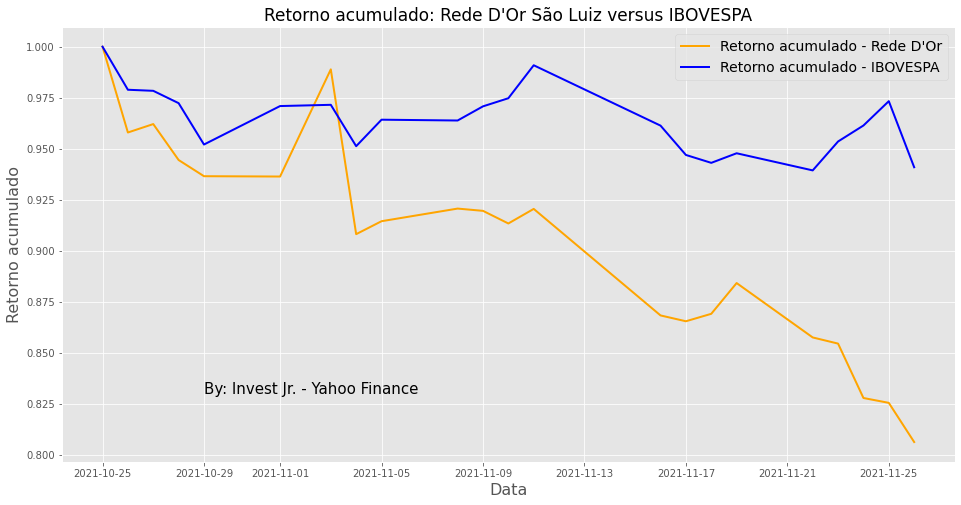

In [15]:
plt.figure(figsize=(16, 8));
plt.title("Taesa versus IBOVESPA", fontsize=17);
x, = plt.plot(retorno_acumulado['RDOR3.SA'], color='orange', linewidth=2);
y, = plt.plot(retorno_acumulado['^BVSP'], color='blue', linewidth=2);
plt.xlabel('Data', fontsize=16);
plt.ylabel('Retorno acumulado', fontsize=16);
#plt.major_formatter(mdates.DateFormatter('%y-%m'))
plt.text(np.Datetime64('2021-10-29'), 0.830, 'By: Invest Jr. - Yahoo Finance', fontsize=15);
plt.legend([x, y], ["Taesa", 'IBOVESPA'], loc=1, fontsize=14);

Correlação média dos retornos acumulados das variáveis 

In [8]:
corr = retorno_acumulado.corr()
corr

,RDOR3.SA,^BVSP
RDOR3.SA,1.000000,0.977142
^BVSP,0.977142,1.000000


Criando mapa de calor

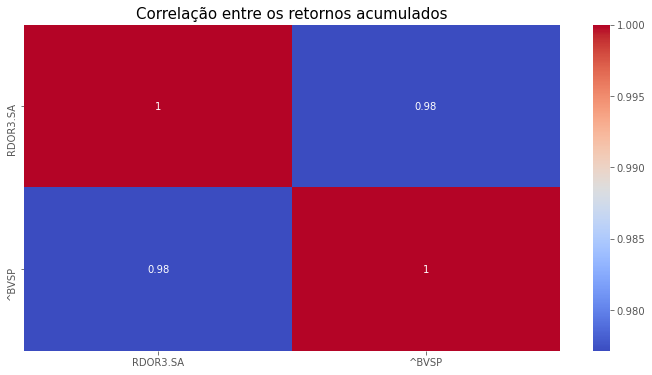

In [9]:
plt.figure(figsize=(12, 6));
sns.heatmap(corr, annot=True, cmap='coolwarm');
plt.title('Correlação entre os retornos acumulados', fontsize=15);

Automatizando

In [57]:
def retorno_acumulado():
    
    #Buscando as empresas
    tickers = ['TAEE11.SA', '^BVSP']
    dados = pd.DataFrame()

    for ticker in tickers:
        dados[ticker] = yf.download(ticker, start='2021-10-25', end='2021-11-25')['Adj Close']
    
    #Retorno simples acumulado
    retorno_simples = dados.pct_change()
    
    #Retorno simples acumulado e normalizado
    retorno_acumulado = (1 + retorno_simples).cumprod()
    retorno_acumulado.iloc[0] = 1
    
    #Visualização
    plt.figure(figsize=(16, 8));
    plt.title(f"{tickers[0]} versus IBOVESPA", fontsize=17);
    x, = plt.plot(retorno_acumulado['TAEE11.SA'], color='orange', linewidth=2);
    y, = plt.plot(retorno_acumulado['^BVSP'], color='blue', linewidth=2);
    plt.xlabel('Data', fontsize=16);
    plt.ylabel('Retorno acumulado', fontsize=16);
    #plt.major_formatter(mdates.DateFormatter('%y-%m'))
    plt.text(np.Datetime64('2021-10-29'), 0.94, 'By: Invest Jr. - Yahoo Finance', fontsize=15);
    plt.legend([x, y], ['TAEE11.SA', 'IBOVESPA'], loc=2, fontsize=14);
    
    return plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


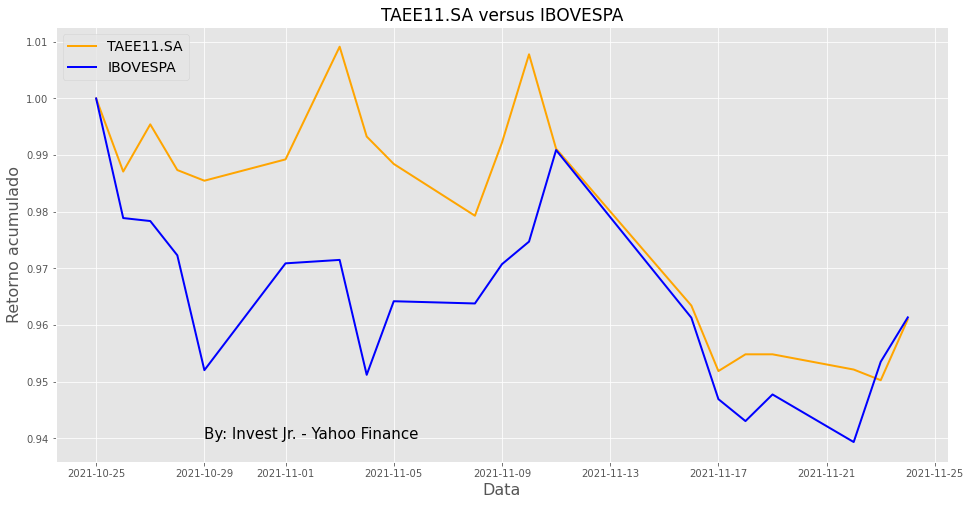

In [58]:
retorno_acumulado()

SCRIP FINALIZADO!